In [1]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
# Load data from the pickle file
with open('data.pickle', 'rb') as f:
    X_fit, y_fit, X_test, y_test = pickle.load(f)

# 1. Default Models

## 1.1. Logistic Regression Default

In [3]:
# Define the logistic regression model
def logistic_regression_model(X_fit, y_fit, X_test, y_test):

    # Initialize logistic regression model with default parameters
    model = LogisticRegression()
    # Fit the model on the training data
    model.fit(X_fit, y_fit)
    
    # Predict on the testing data
    y_pred_lr = model.predict(X_test)


    # Calculate parameters on test data
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    recall_lr = recall_score(y_test, y_pred_lr)
    precision_lr = precision_score(y_test, y_pred_lr)
    f1_lr = f1_score(y_test, y_pred_lr)
    roc_lr = roc_auc_score(y_test, y_pred_lr)

    y_prob_lr = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob_lr)  # Assign the third value to 
    roc_auc = auc(fpr, tpr)

    # Save the model metrics
    models = [('Logistic Regression Defult', accuracy_lr, recall_lr, precision_lr, f1_lr, roc_lr, roc_auc)]
    df_logistic_metrics = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC(%)', 'AUC from fpr tpr(%)'])

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    
    return y_pred_lr, df_logistic_metrics, plt



### Call the logistic regression model function

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC(%),AUC from fpr tpr(%)
0,Logistic Regression Defult,0.787396,0.25498,0.705882,0.374634,0.609807,0.6182


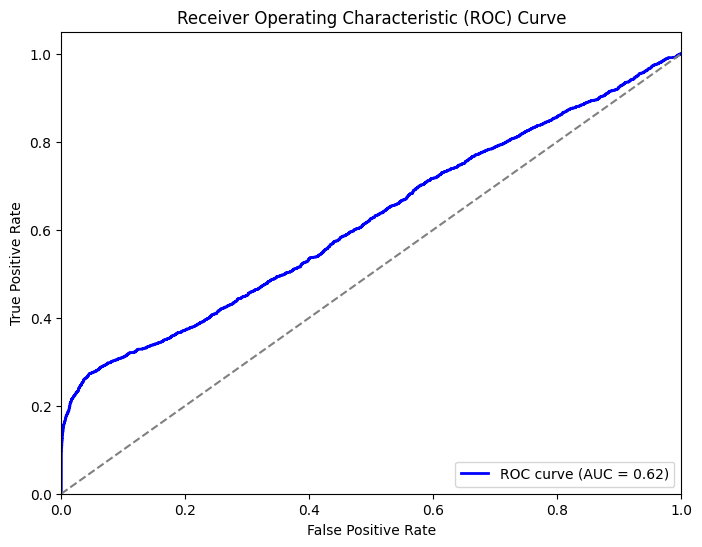

In [4]:
y_pred_lr, df_logistic_metrics, plt = logistic_regression_model(X_fit, y_fit, X_test, y_test)
df_logistic_metrics

## 1.2. Random Forest Default

In [5]:
# Define the random forest model
def random_forest_model(X_fit, y_fit, X_test, y_test):
    # Initialize random forest model with default parameters
    model = RandomForestClassifier()
    # Fit the model on the training data
    model.fit(X_fit, y_fit)
    
    # Predict on the testing data
    y_pred_rf = model.predict(X_test)

    # Calculate parameters on test data
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    recall_rf = recall_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf)
    roc_rf = roc_auc_score(y_test, y_pred_rf)

    # Calculate probabilities of the positive class for fpr tpr calculation
    y_prob_rf = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
    roc_auc = auc(fpr, tpr)

    # Save the model metrics
    models = [('Random Forest Defult', accuracy_rf, recall_rf, precision_rf, f1_rf, roc_rf, roc_auc)]
    df_random_metrics = pd.DataFrame(models, columns = ['Model', 'Accuracy (%)', 'Recall (%)', 'Precision (%)', 'F1 (%)', 'AUC(%)', 'AUC from fpr tpr(%)'])

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    
    return y_pred_rf, df_random_metrics, plt, model

### Call the random forest model function

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC(%),AUC from fpr tpr(%)
0,Random Forest Defult,0.846434,0.621071,0.72469,0.668892,0.771264,0.894861


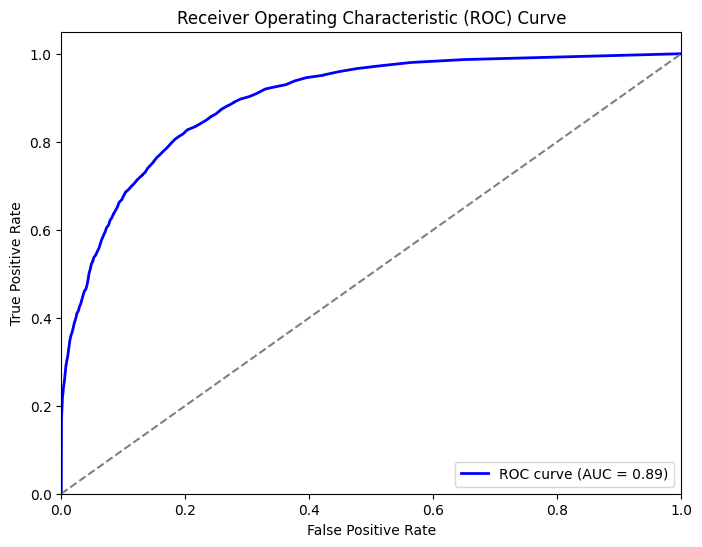

In [6]:
y_pred_rf, df_random_metrics, plt, rf_model = random_forest_model(X_fit, y_fit, X_test, y_test)
df_random_metrics

## 1.3. Compare Results

In [7]:
df_combined = pd.concat([df_logistic_metrics, df_random_metrics], axis=0)
df_combined

,Model,Accuracy (%),Recall (%),Precision (%),F1 (%),AUC(%),AUC from fpr tpr(%)
0,Logistic Regression Defult,0.787396,0.254980,0.705882,0.374634,0.609807,0.618200
0,Random Forest Defult,0.846434,0.621071,0.724690,0.668892,0.771264,0.894861


# 2. Counterfactual Explanations

In [8]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36177 entries, 0 to 36176
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               36177 non-null  int64  
 1   workclass         36177 non-null  int32  
 2   fnlwgt            36177 non-null  int64  
 3   education-num     36177 non-null  int64  
 4   capital-gain      36177 non-null  int64  
 5   capital-loss      36177 non-null  int64  
 6   hours-per-week    36177 non-null  int64  
 7   marital-status_0  36177 non-null  float64
 8   marital-status_1  36177 non-null  float64
 9   marital-status_2  36177 non-null  float64
 10  marital-status_3  36177 non-null  float64
 11  marital-status_4  36177 non-null  float64
 12  marital-status_5  36177 non-null  float64
 13  marital-status_6  36177 non-null  float64
 14  relationship_0    36177 non-null  float64
 15  relationship_1    36177 non-null  float64
 16  relationship_2    36177 non-null  float6

In [9]:
import dice_ml
from dice_ml.utils import helpers # helper functions
from sklearn.model_selection import train_test_split

In [10]:
import dice_ml

def generate_counterfactual_explanations(X_fit, y_fit, model, samplenum, cf_number, target_var, features):
    # Sample data
    sample = X_fit.sample(samplenum, random_state=42)
    
    # Initialize the data for the DICE model
    diceSet = dice_ml.Data(dataframe=sample.assign(income=y_fit), features = features, continuous_features=[ 'capital-gain','capital-loss'], outcome_name= target_var)

    # Initialize the model for DiCE
    m = dice_ml.Model(model=model, backend="sklearn")

    # Initialize the DiCE model
    exp = dice_ml.Dice(diceSet, m, method="random")

    # Generate counterfactual explanations
    counterfactual_expl = exp.generate_counterfactuals(sample, total_CFs= cf_number, desired_class="opposite")


    # Visualize counterfactual explanations
    counterfactual_expl.visualize_as_dataframe(show_only_changes=True)

    # Calculate local feature importance
    query_instance = sample
    imp_local = exp.local_feature_importance(query_instance, total_CFs=10)
    print('local feature importance', imp_local.local_importance)

    # Calculate global feature importance using selected features
  #  imp_global = exp.global_feature_importance(query_instances)

    # Print the summary of global feature importance
  #  print('global feature importance', imp_global.summary_importance)


In [11]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36177 entries, 0 to 36176
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               36177 non-null  int64  
 1   workclass         36177 non-null  int32  
 2   fnlwgt            36177 non-null  int64  
 3   education-num     36177 non-null  int64  
 4   capital-gain      36177 non-null  int64  
 5   capital-loss      36177 non-null  int64  
 6   hours-per-week    36177 non-null  int64  
 7   marital-status_0  36177 non-null  float64
 8   marital-status_1  36177 non-null  float64
 9   marital-status_2  36177 non-null  float64
 10  marital-status_3  36177 non-null  float64
 11  marital-status_4  36177 non-null  float64
 12  marital-status_5  36177 non-null  float64
 13  marital-status_6  36177 non-null  float64
 14  relationship_0    36177 non-null  float64
 15  relationship_1    36177 non-null  float64
 16  relationship_2    36177 non-null  float6

In [12]:
features={'age': [17, 90], 
          'workclass': [0,7], 
          'education-num': [1, 17],
          'hours-per-week': [1, 99]}


target_var='income'

,
                           'workclass': ['Government', 'Other/Unknown', 'Private', 'Self-Employed'],
                           'education': ['Assoc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters',
                                         'Prof-school', 'School', 'Some-college'],
                           'marital_status': ['Divorced', 'Married', 'Separated', 'Single', 'Widowed'],
                           'occupation': ['Blue-Collar', 'Other/Unknown', 'Professional', 'Sales', 'Service', 'White-Collar'],
                           'race': ['Other', 'White'],
                           'gender': ['Female', 'Male']

In [13]:
# Call the function with appropriate arguments
generate_counterfactual_explanations(X_fit, y_fit, rf_model, 10, 2, target_var, features)

100%|██████████| 10/10 [00:01<00:00,  5.88it/s]

Query instance (original outcome : 0)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,75,4,205860,10,0,1735,40,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,1.0,-,-,1.0
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0


Query instance (original outcome : 0)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,39,2,86143,3,0,0,40,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,-,-,-,11.0,-,-,-,-,-,-,...,-,1.0,-,-,-,-,-,-,-,1.0
1,-,-,-,-,-,1825.0,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0


Query instance (original outcome : 0)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,39,2,48063,8,0,0,32,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,-,-,-,-,-,1962.0,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
1,-,-,-,-,-,1808.0,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0


Query instance (original outcome : 0)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,29,2,276418,9,0,2051,32,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,46.0,-,-,-,-,-,-,-,-,-,...,-,-,-,-,0.0,-,-,-,-,1.0
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,0.0,-,-,-,-,-


Query instance (original outcome : 0)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,29,2,253856,13,0,0,20,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,-,-,-,-,-,-,40.0,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
1,-,-,-,-,-,-,45.0,-,-,-,...,-,-,-,-,-,-,-,-,0.0,1.0


Query instance (original outcome : 0)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,51,2,30008,9,0,0,60,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,-,5.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
1,-,-,-,14.0,-,-,-,-,-,-,...,-,1.0,-,-,-,-,-,-,-,1.0


Query instance (original outcome : 0)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,41,5,118544,10,0,0,12,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,-,-,-,-,-,1909.0,45.0,-,-,1.0,...,-,-,-,-,1.0,-,-,-,-,1.0
1,-,-,-,-,1064.0,1882.0,-,-,-,1.0,...,-,-,-,-,-,-,-,-,-,1.0


Query instance (original outcome : 1)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,46,2,142828,9,0,0,40,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1



Diverse Counterfactual set (new outcome: 0)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,0.0,-,-,0.0
1,-,-,-,10.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0


Query instance (original outcome : 0)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,31,2,197058,14,2597,0,45,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,-,-,-,-,-,-,-,-,-,1.0,...,-,-,-,-,-,-,-,-,-,1.0
1,-,-,-,-,-,-,-,-,-,1.0,...,-,1.0,-,-,-,-,-,-,-,-


Query instance (original outcome : 0)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,41,5,176155,11,0,0,40,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,marital-status_0,marital-status_1,marital-status_2,...,relationship_4,relationship_5,race_0,race_1,race_2,race_3,race_4,sex_0,sex_1,income
0,51.0,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1.0
1,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


100%|██████████| 10/10 [00:02<00:00,  3.37it/s]

local feature importance [{'capital-loss': 1.0, 'age': 0.3, 'education-num': 0.2, 'race_2': 0.1, 'workclass': 0.0, 'fnlwgt': 0.0, 'hours-per-week': 0.0, 'marital-status_0': 0.0, 'marital-status_1': 0.0, 'marital-status_2': 0.0, 'marital-status_3': 0.0, 'marital-status_4': 0.0, 'marital-status_5': 0.0, 'marital-status_6': 0.0, 'relationship_0': 0.0, 'relationship_1': 0.0, 'relationship_2': 0.0, 'relationship_3': 0.0, 'relationship_4': 0.0, 'relationship_5': 0.0, 'race_0': 0.0, 'race_1': 0.0, 'race_3': 0.0, 'race_4': 0.0, 'sex_0': 0.0, 'sex_1': 0.0, 'capital-gain': 0.0}, {'education-num': 0.5, 'capital-loss': 0.5, 'workclass': 0.1, 'fnlwgt': 0.1, 'hours-per-week': 0.1, 'sex_1': 0.1, 'capital-gain': 0.1, 'age': 0.0, 'marital-status_0': 0.0, 'marital-status_1': 0.0, 'marital-status_2': 0.0, 'marital-status_3': 0.0, 'marital-status_4': 0.0, 'marital-status_5': 0.0, 'marital-status_6': 0.0, 'relationship_0': 0.0, 'relationship_1': 0.0, 'relationship_2': 0.0, 'relationship_3': 0.0, 'relations

In [14]:
print(X_fit['education-num'].value_counts())
print()
print(X_fit['education-num'].value_counts().head())

9     11849
10     7937
13     6048
14     1960
11     1575
7      1285
12     1222
6       969
15      643
4       632
5       549
8       475
16      437
3       354
2       181
1        61
Name: education-num, dtype: int64

9     11849
10     7937
13     6048
14     1960
11     1575
Name: education-num, dtype: int64
